# 1. Introduction
Stress detection is a challenging task, as there are so many words that can be used by people on their posts 
that can show whether a person is having psychological stress or not. While looking for datasets that 
I can use to train a machine learning model for stress detection,
I found a dataset on Kaggle with 116 columns. We only need to use the text and label column for this task.

# Summary
Stress-Lysis data might be unsuitable for classification such as decision tree and random forest to discover insightful suggestions.
Decision tree suggests that high stress people's temperature is higher than 91.905°F and low one is lower than 84.005°F.
Decision tree and random forest are both accurate when classifing Stress-Lysis data.

# 2. Data Preprocessing


In [12]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## 2-1. Import Packages and Data

In [55]:
# Ignore warnings
import warnings
warnings.simplefilter("ignore")

# Frequently using packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Useful data handling package
! pip install dfply -q
from dfply import *

# Data Analyses
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
'''
Accuracy Score = (TP+TN)/ (TP+FN+TN+FP)

The R² score, also known as the coefficient of determination, is a metric used to evaluate the performance of a regression
model. 

MSE is a risk method that facilitates us to signify the average squared difference between the predicted and the actual 
value of a feature or variable.

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes 
the average to improve the predictive accuracy of that datasetand it is ensemble learning, which is a process of combining
multiple classifiers to solve a complex problem and to improve the performance of the model.'''

'\nAccuracy Score = (TP+TN)/ (TP+FN+TN+FP)\n\nThe R² score, also known as the coefficient of determination, is a metric used to evaluate the performance of a regression\nmodel. \n\nMSE is a risk method that facilitates us to signify the average squared difference between the predicted and the actual \nvalue of a feature or variable.\n\nRandom Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes \nthe average to improve the predictive accuracy of that dataset '

In [10]:
df_stress = pd.read_csv('C:/Users/ritik/Downloads/Stress-Lysis.csv')

## 2-2. Exploratory Data Analytics

### Summary
Stress-Lysis has no outliers in all variables based on  𝑄1−1.5IQR
  and  𝑄3+1.5IQR
 .
High stress people seem to take more than twice steps as the others.
They tend to have 10 to 15 higher body humidity or temperatures than the others.

### The data is as follows.

Humidity: Body humidity in percent.
Temperature: Body temperature in Fahrenheit.
Step count: The number of steps.
Stress Level: 0 is low stress, 1 is normal stress, and 2 is high stress.

In [14]:
df_stress.head(10)

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0
5,11.31,80.31,40,0
6,18.16,87.16,88,1
7,28.20,97.20,162,2
8,14.25,83.25,61,0
9,26.13,95.13,168,2


In [15]:
len(df_stress)

2001

In [16]:
df_stress = df_stress.rename(columns = {'Step count': 'Step_count', 'Stress Level': 'Stress_Level'})
df_stress.head(1)

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,1


# Data Description
To take a grasp on the data, I find respective descriptive statistics

### Humidity

In [20]:
df_stress >> group_by(X.Stress_Level) >> mutate(
    Humidity_size = X.Humidity.count(),
    Humidity_min = np.min(X.Humidity),
    Humidity_max = np.max(X.Humidity),
    Humidity_mean = np.mean(X.Humidity),
    Humidity_sd = np.std(X.Humidity),
    Humidity_cil = np.mean(X.Humidity) - 1.96 * np.std(X.Humidity),
    Humidity_cih = np.mean(X.Humidity) + 1.96 * np.std(X.Humidity)
) >> head(1) >> select(
    X.Stress_Level,
    X.Humidity_size, X.Humidity_min, X.Humidity_max,
    X.Humidity_mean, X.Humidity_sd, X.Humidity_cil, X.Humidity_cih
)

,Stress_Level,Humidity_size,Humidity_min,Humidity_max,Humidity_mean,Humidity_sd,Humidity_cil,Humidity_cih
4,0,501,10.00,15.0,12.500,1.446260,9.665331,15.334669
0,1,790,15.01,22.9,18.955,2.280532,14.485158,23.424842
2,2,710,22.91,30.0,26.455,2.049591,22.437801,30.472199


#### Humidity descriptions show that there are no outliers in each stress level.

In [23]:
df_stress >> group_by(X.Stress_Level) >> mutate(
    Stepcount_size = X.Step_count.count(),
    Stepcount_min = np.min(X.Step_count),
    Stepcount_max = np.max(X.Step_count),
    Stepcount_mean = np.mean(X.Step_count),
    Stepcount_sd = np.std(X.Step_count),
    Stepcount_cil = np.mean(X.Step_count) - 1.96 * np.std(X.Step_count),
    Stepcount_cih = np.mean(X.Step_count) + 1.96 * np.std(X.Step_count)
) >> head(1) >> select(
    X.Stress_Level,
    X.Stepcount_size, X.Stepcount_min, X.Stepcount_max,
    X.Stepcount_mean, X.Stepcount_sd, X.Stepcount_cil, X.Stepcount_cih
)

,Stress_Level,Stepcount_size,Stepcount_min,Stepcount_max,Stepcount_mean,Stepcount_sd,Stepcount_cil,Stepcount_cih
4,0,501,0,90,42.934132,26.173337,-8.365609,94.233872
0,1,790,0,129,78.130380,37.653308,4.329896,151.930864
2,2,710,130,200,165.000000,20.493902,124.831953,205.168047


In [24]:
Step count statistics describe that stress level 1 seems to have several outliers. Hence, I draw the related histgrams.

SyntaxError: invalid syntax (<ipython-input-24-17c6da3e3586>, line 1)

### Scatter Plot and Boxplot
Apparently, the number of steps has some outliers in stress level 1. The scatter plot and boxplot are as follows.

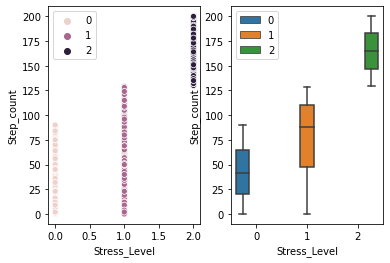

In [26]:
fig, axs = plt.subplots(ncols=2)
sns.scatterplot(data=df_stress,
                x="Stress_Level", y="Step_count", hue=df_stress.Stress_Level.tolist(),
                ax=axs[0])
sns.boxplot(data=df_stress,
            x="Stress_Level", y="Step_count", hue=df_stress.Stress_Level.tolist(),
            ax=axs[1])
plt.show()

## This box-plot suggests that the number of steps has no outliers based on  𝑄1−1.5IQR
  and  𝑄3+1.5IQR
 .

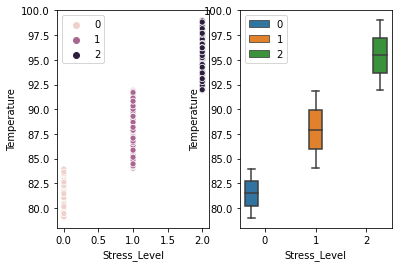

In [29]:
fig, axs = plt.subplots(ncols=2)
sns.scatterplot(data=df_stress,
                x="Stress_Level", y="Temperature", hue=df_stress.Stress_Level.tolist(),
                ax=axs[0])
sns.boxplot(data=df_stress,
            x="Stress_Level", y="Temperature", hue=df_stress.Stress_Level.tolist(),
            ax=axs[1])
plt.show()

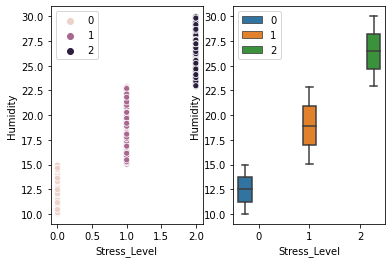

In [30]:
fig, axs = plt.subplots(ncols=2)
sns.scatterplot(data=df_stress,
                x="Stress_Level", y="Humidity", hue=df_stress.Stress_Level.tolist(),
                ax=axs[0])
sns.boxplot(data=df_stress,
            x="Stress_Level", y="Humidity", hue=df_stress.Stress_Level.tolist(),
            ax=axs[1])
plt.show()

## 3.Analyses

## Summary
#### Decision tree suggests that high stress people's temperature is higher than 91.905°F and low one is lower than 84.005°F.
#### Decision tree and random forest are both accurate when classifing Stress-Lysis data.

## Data Preparation

In [34]:
df_y = df_stress['Stress_Level']
df_x = df_stress[df_stress.columns[df_stress.columns != 'Stress_Level']]
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, random_state=42)

In [35]:
train_x.count

<bound method DataFrame.count of       Humidity  Temperature  Step_count
548      15.68        84.68          22
937      23.37        92.37         176
845      15.17        84.17          62
1608     19.88        88.88          92
1940     10.50        79.50          50
...        ...          ...         ...
1130     10.73        79.73          73
1294     22.67        91.67         113
860      25.38        94.38         164
1459     22.68        91.68         114
1126     12.92        81.92          19

[1500 rows x 3 columns]>

In [36]:
test_x.count

<bound method DataFrame.count of       Humidity  Temperature  Step_count
1394     11.57        80.57          66
353      21.63        90.63         115
1334     16.12        85.12          66
906      15.32        84.32          77
1290     11.65        80.65          74
...        ...          ...         ...
1357     12.47        81.47          65
408      28.63        97.63         134
1615     28.74        97.74         145
694      14.68        83.68          13
1649     27.28        96.28         141

[501 rows x 3 columns]>

## 3-1. Decision Tree

In [38]:
# Build a learning model
model_dt = tree.DecisionTreeClassifier(max_depth=3, random_state=42)

# Set the test data for learning
model_dt.fit(train_x, train_y)

# Conduct inference
test_dt = model_dt.predict(test_x)

# Calculate the accuracy
score_dt = model_dt.score(test_x, test_y)
print(f'Accuracy is {score_dt * 100}%.')

Accuracy is 100.0%.


[Text(200.88000000000002, 181.2, 'Temperature <= 91.905\ngini = 0.655\nsamples = 1500\nvalue = [373, 600, 527]\nclass = y[1]'),
 Text(133.92000000000002, 108.72, 'Temperature <= 84.005\ngini = 0.473\nsamples = 973\nvalue = [373, 600, 0]\nclass = y[1]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 373\nvalue = [373, 0, 0]\nclass = y[0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 600\nvalue = [0, 600, 0]\nclass = y[1]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 527\nvalue = [0, 0, 527]\nclass = y[2]')]

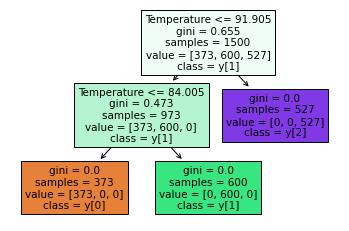

In [39]:
plot_tree(model_dt, feature_names=train_x.columns, class_names=True, filled=True)

## This decision tree suggests the following three points.

#### If body temperature is higher than 91.905°F, respective people confirmly have high stress.
#### If body temperature is lower than 84.005°F, classified people have low stress.
#### If else, the stress level is normal.


## 3-2. Random Forest

## **Classification**

In [43]:
# Build a leaening model
model_rf = RandomForestClassifier(max_depth=3, random_state=42)

# Set the test data for learning
model_rf.fit(train_x, train_y)

# Conduct inference
test = model_rf.predict(test_x)

# Calculate the accuracy
score_rfc = accuracy_score(test_y, test)
print(f'Accuracy is {score_rfc * 100}%.')

Accuracy is 100.0%.


## Regression

In [45]:
score_reg = model_rf.score(test_x, test_y)
print(f'Accuracy is {score_reg * 100}%.')

Accuracy is 100.0%.


### RMSE and R2 Evaluation

In [47]:
# Predict train_x
train_y_pred = model_rf.predict(train_x)

# Predict test_y
test_y_pred = model_rf.predict(test_x)

# RMSE
print('RMSE Train: %.2f, Test: %.2f' % (
        mean_squared_error(train_y, train_y_pred, squared=False), # Train
        mean_squared_error(test_y, test_y_pred, squared=False)    # test
      ))

# R2
print('R^2 Train: %.2f, Test: %.2f' % (
        r2_score(train_y, train_y_pred), # Train
        r2_score(test_y, test_y_pred)    # Test
      ))

RMSE Train: 0.00, Test: 0.00
R^2 Train: 1.00, Test: 1.00


### Residual Plot Evaluation

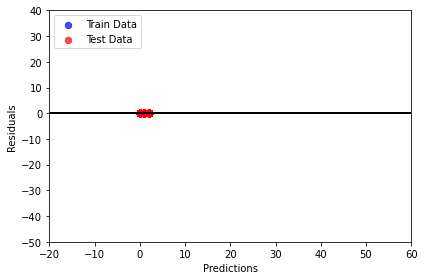

In [49]:
# Plot predictions and residuals in train data
plt.scatter(train_y_pred,
            train_y_pred - train_y,
            c='blue',
            marker='o',
            s=40,
            alpha=0.7,
            label='Train Data')


# Plot predictions and residuals in test data
plt.scatter(test_y_pred,
            test_y_pred - test_y,
            c='red',
            marker='o',
            s=40,
            alpha=0.7,
            label='Test Data')

# Configurate Style
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-20, xmax=60, lw=2, color='black')
plt.xlim([-20, 60])
plt.ylim([-50, 40])
plt.tight_layout()
plt.show()

## 4. Discussion

## 4-1. Decision Tree and Random Forest
Taking into account accuracy scores, RMSE, R2, and a residual-plot, the both models seem to classify stress levels accurately. However, respective outputs imply that Stress-Lysis data might be inadequate to clasiffication as the box-plots have already shown.

 ## 4-2. The Other Methods
Basic data aggregation could be suited to such data.

# CONCLUSION
While classification methods such as desicion tree and random forest are frequently used, the findings 
of this notebook show that moderately classified data might be unsuitable for scrutinizing insightful suggestions.